In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from datetime import timedelta
from scipy import stats
import warnings


### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [30]:
claims_data = pd.read_csv("claims.csv")
cust_data = pd.read_csv("cust_demographics.csv")

In [31]:
combine_data = cust_data.merge(claims_data, left_on = "CUST_ID",right_on = "customer_id" , how = "inner")
combine_data.drop("customer_id", inplace = True, axis = 1)

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [32]:
print(combine_data.dtypes)
# dateofbirth - need to chnage to datetime
# claim_date - need to chnage to datetime
# claim_amount - need to chnage to int
# contact - need to chnage to int


CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object


### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [33]:
combine_data["claim_amount"] = combine_data["claim_amount"].str.replace("$"," ")
combine_data["claim_amount"] = combine_data["claim_amount"].astype(float)


C:\Users\Abdu rahuf\AppData\Local\Temp\ipykernel_7736\3516642143.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combine_data["claim_amount"] = combine_data["claim_amount"].str.replace("$"," ")


In [34]:
print(combine_data["claim_amount"].dtypes)

float64


### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.


In [35]:
# 0 for unkonw or not reported and 1 for 0
combine_data["alert_flag"] = 0
combine_data.loc[combine_data["police_report"] == "Yes","alert_flag"] = 1
combine_data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,0
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,1
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,0
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,1
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,0


### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique.
    Retain the most recent observation and delete any duplicated records in the data based on the customer ID column

In [36]:
combine_data["claim_date"] = pd.to_datetime(combine_data["claim_date"] , format = "%m/%d/%Y")
combine_data.sort_values("claim_date", ascending = False)
combine_data.drop_duplicates(subset = "CUST_ID" , keep = "first", inplace = True)
combine_data.reset_index(drop = True)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
4,19269962,Male,13-May-77,NV,956-871-8691,Gold,22890252,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,1
1074,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0
1075,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
1076,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [37]:
# cheking for null value
combine_data.isnull().sum()
# mean value for claim amount
mean_claim_amount = round(combine_data["claim_amount"].mean(),2)
# mean value for total policy claim
total_policy_claims_mean = round(combine_data["total_policy_claims"].mean())
#replacing null value with mean value
combine_data.loc[combine_data["claim_amount"].isna() , "claim_amount" ] = mean_claim_amount
combine_data.loc[combine_data["total_policy_claims"].isna() , "total_policy_claims" ] = total_policy_claims_mean
combine_data.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
alert_flag             0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria
    Children < 18
    Youth 18-30
    Adult 30-60
    Senior > 60

In [38]:
# converting date of birth column to datetime
combine_data["DateOfBirth"] = pd.to_datetime(combine_data["DateOfBirth"], format = ("%d-%b-%y"))
print(combine_data["DateOfBirth"].dtype)


datetime64[ns]


In [39]:
# correcting the mistake in date of birth, some dob show negative age,
combine_data["DateOfBirth"] = combine_data.apply(lambda x: x["DateOfBirth"] - timedelta(days=365*100) if x["DateOfBirth"].year > 2023 else x["DateOfBirth"], axis=1)
combine_data["Age"] =dt.datetime.now().year - combine_data["DateOfBirth"].dt.year 

In [40]:
Children = combine_data[combine_data["Age"] < 18]
# There is no data available for students.
Youth = combine_data[(combine_data["Age"] > 18) & (combine_data["Age"] <= 30 )]
Adult = combine_data[(combine_data["Age"] > 30) & (combine_data["Age"] <= 60 )]
Senior = combine_data[combine_data["Age"] > 60]


### 8. What is the average amount claimed by the customers from various segments?


In [41]:
# average claim amount by  youth
youth_mean_cliam_amt= round(Youth["claim_amount"].mean(),2)
# average claim amount by  adult
adult_mean_cliam_amt = round(Adult["claim_amount"].mean(),2)
# average claim amount by  senior
senior_mean_cliam_amt = round(Senior["claim_amount"].mean(),2)
print(f"average claim amount by  youths: {youth_mean_cliam_amt}")
print(f"average claim amount by adults : {adult_mean_cliam_amt}")
print(f"average claim amount by seniors : {senior_mean_cliam_amt}")

average claim amount by  youths: 11848.76
average claim amount by adults : 12613.94
average claim amount by seniors : 12677.71


### 10 What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018

In [42]:
# 20 days prior to 1st oct 2018, ie 10th sep 2018
date = dt.datetime(2018, 9, 10)
claim_date_befor_sep_10 = combine_data[combine_data["claim_date"] <= date]
claim_amt_bfr_oct_10 = claim_date_befor_sep_10.groupby("incident_cause")["claim_amount"].sum()
claim_amt_bfr_oct_10


incident_cause
Crime                  724462.5
Driver error          3264286.0
Natural causes        1312706.0
Other causes          3725038.5
Other driver error    3318806.5
Name: claim_amount, dtype: float64

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [43]:
filter_state = Adult[Adult["State"].isin(["TX","DE","AK"])]
no_of_claim = filter_state["incident_cause"].isin(["Driver error","Other driver error"]).sum()
print(f"No.of adults from TX, DE and AK claimed insurance for driver related issues and causes is : {no_of_claim}")

No.of adults from TX, DE and AK claimed insurance for driver related issues and causes is : 27


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.


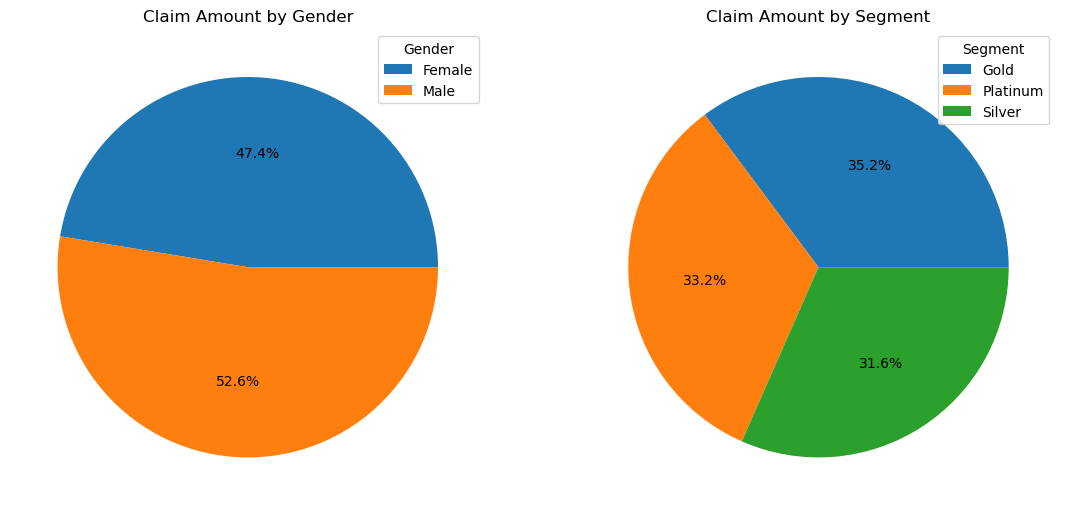

In [44]:
gender_claim = combine_data.groupby("gender")["claim_amount"].sum()
total_claim_amt = combine_data["claim_amount"].sum()
gender_claim_percentage = round((gender_claim/total_claim_amt)*100, 1)
segment_claim = combine_data.groupby("Segment")["claim_amount"].sum()
segment_claim_percentage = round((segment_claim/total_claim_amt)*100, 1)

# Plotting pie chart for gender
plt.figure(figsize=(13.5, 9))
plt.subplot(1, 2, 1)
plt.pie(x=gender_claim_percentage,  labeldistance=0.5, autopct='%1.1f%%')
handles = gender_claim_percentage.index
plt.legend( handles, title = "Gender")
plt.title("Claim Amount by Gender")

# Plotting pie chart for segment
plt.subplot(1, 2, 2)
plt.pie(x=segment_claim_percentage, labeldistance=1.1, autopct='%1.1f%%')
handles = segment_claim_percentage.index
plt.legend( handles, title = "Segment")
plt.title("Claim Amount by Segment")

plt.show()


### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

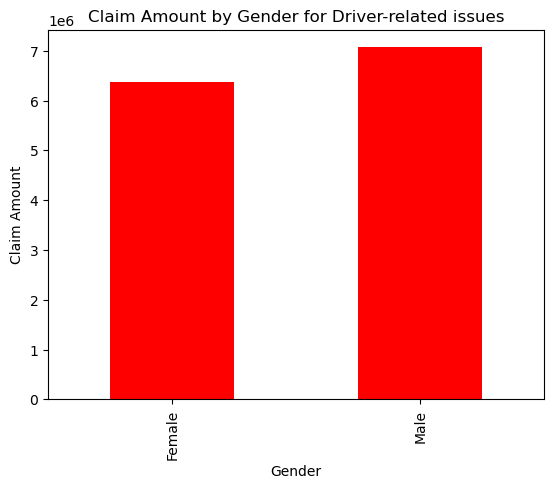

In [45]:
Driver_issue = combine_data["incident_cause"].isin(["Driver error","Other driver error"])
Driver_issue_gender = combine_data.groupby("gender",)["claim_amount"].sum()
# Plot the bar chart
Driver_issue_gender.plot(kind='bar', color='red')
plt.xlabel('Gender')
plt.ylabel('Claim Amount')
plt.title('Claim Amount by Gender for Driver-related issues')
plt.show()


### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.


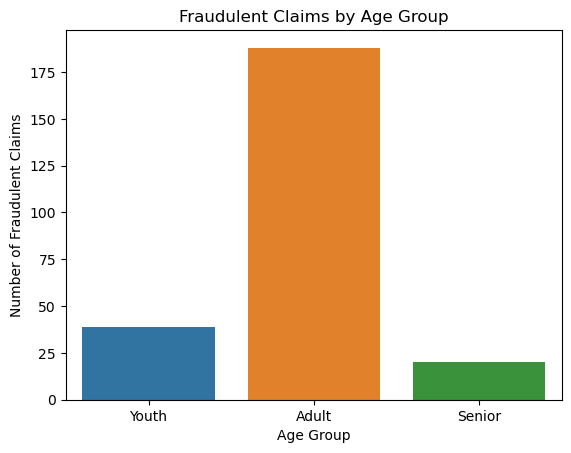

In [46]:
youth_fraudulent = (Youth["fraudulent"] == "Yes").sum()
adult_fraudulent =  (Adult["fraudulent"] == "Yes").sum()
senior_fraudulent =  (Senior["fraudulent"] == "Yes").sum()

fraudulent_data = {"Youth" : youth_fraudulent ,
                  "Adult" : adult_fraudulent,
                  "Senior" : senior_fraudulent }
# Plot the bar chart
sns.barplot(x=list(fraudulent_data.keys()), y=list(fraudulent_data.values()))
plt.xlabel("Age Group")
plt.ylabel("Number of Fraudulent Claims")
plt.title("Fraudulent Claims by Age Group")
plt.show()

In [47]:
(combine_data["fraudulent"] == "Yes").sum()

247

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order

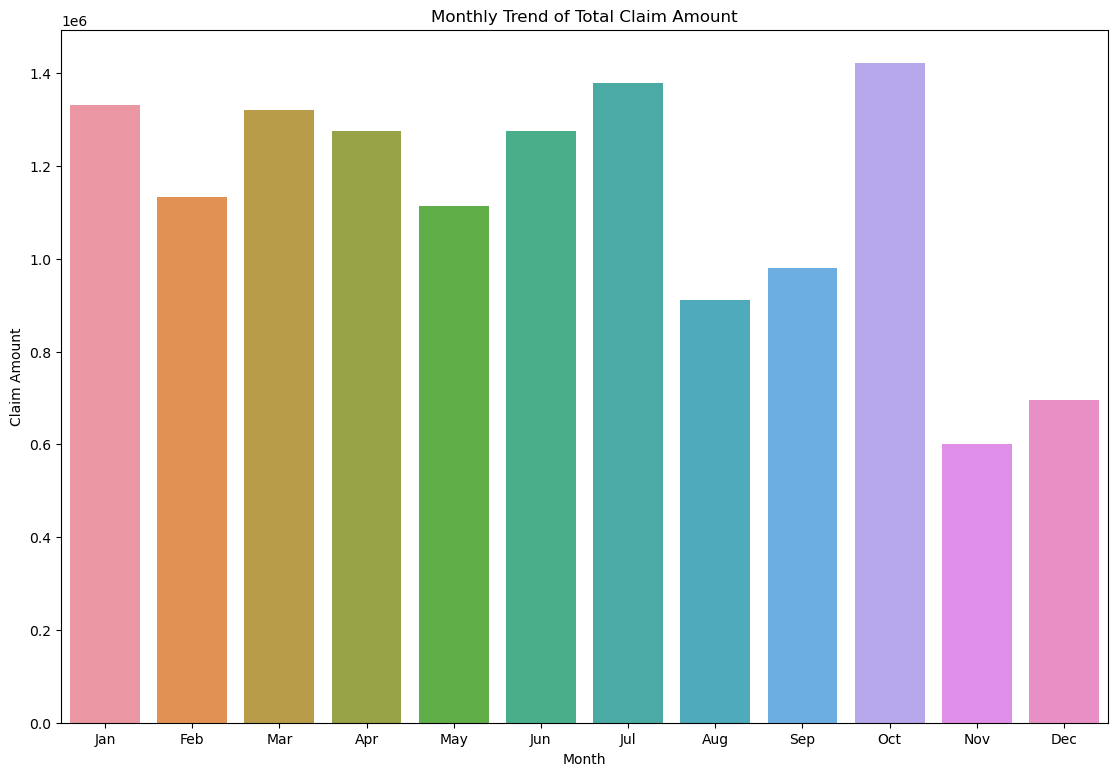

In [48]:
combine_data["Month"] = combine_data["claim_date"].dt.strftime("%b")
monthly_claim = combine_data.groupby("Month")["claim_amount"].sum()
monthly_claim = monthly_claim.reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


plt.figure(figsize = (13.5,9))
sns.barplot(x = monthly_claim.index ,  y = monthly_claim.values)
plt.xlabel('Month')
plt.ylabel('Claim Amount')
plt.title('Monthly Trend of Total Claim Amount')
plt.show()


### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

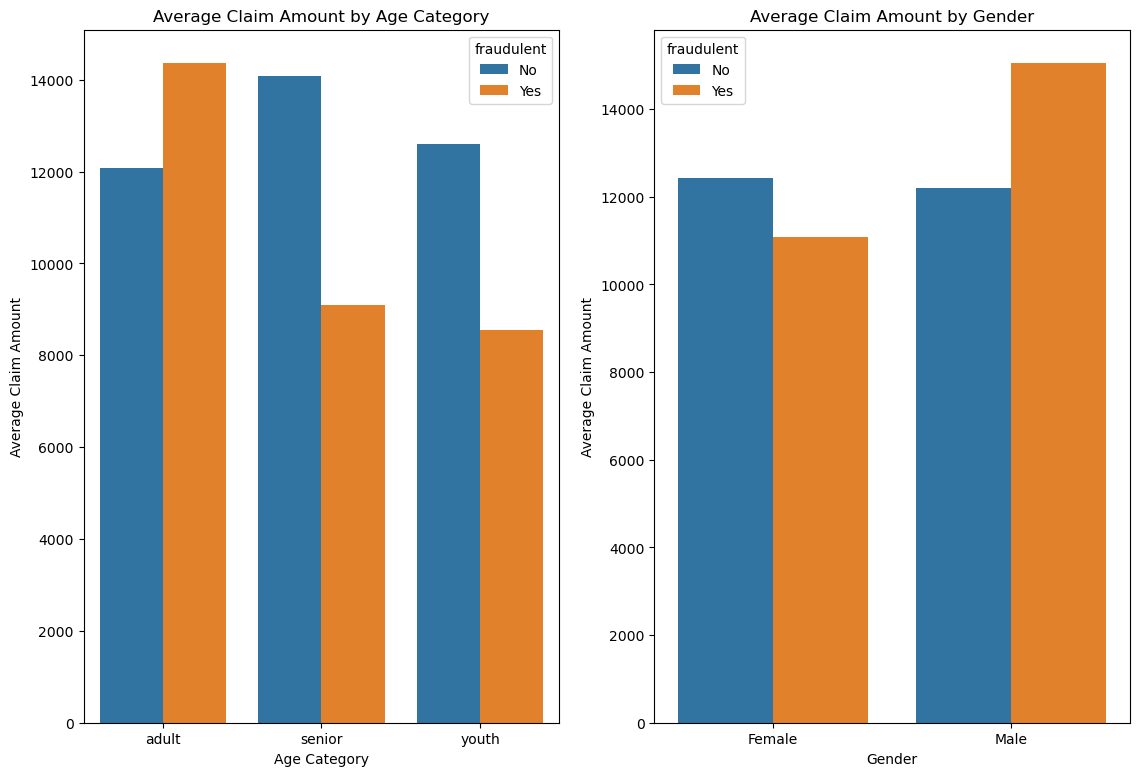

In [49]:
# adding age category for combine data from youth, adult and seniors
combine_data["age_cat"] = np.where(combine_data["CUST_ID"].isin(Youth["CUST_ID"]), "youth", np.where(combine_data["CUST_ID"].isin(Adult["CUST_ID"]), "adult", "senior"))
# grouping by gender and age cat
age_fradudulent_mean = round(combine_data.groupby(["age_cat","fraudulent"])["claim_amount"].mean().reset_index(),2)
gender_fradudulent_mean = round(combine_data.groupby(["gender","fraudulent"])["claim_amount"].mean().reset_index(),2)
# plot gacetted bar

plt.figure(figsize=(13.5, 9))
plt.subplot(1,2,1)
sns.barplot(x = "age_cat" , y = "claim_amount" , hue = "fraudulent" , data =age_fradudulent_mean )
plt.title("Average Claim Amount by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Average Claim Amount")


plt.subplot(1,2,2)
sns.barplot(x = "gender" , y = "claim_amount" , hue = "fraudulent" , data =gender_fradudulent_mean )
plt.title("Average Claim Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Claim Amount")

plt.show()


### 16. Is there any similarity in the amount claimed by males and females?


##### we need to find any simalarities or relationship between claimed between gender and claim amount
    we can  find similarities by performing statistical hypothesis test 
    here we can perform a two-sample t-test to compare the mean amount claimed by males and females. 
##### steps in hypothetical testing:
    - Formulate the null and alternative hypothesis:
    H0(null hypothesis): There is no difference in the mean amount claimed by males and females (μ1 - μ2 = 0)
    Ha(alternative hypothesis): There is a difference in the mean amount claimed by males and females (μ1 - μ2 ≠ 0)
    - Set the significance level:
    Let's set the significance level at 0.05, meaning we are 95% confident in our results.
    - Calculate the t-statistic:
    - Determine the degrees of freedom:
    - Obtain the p-value:
    - Make a conclusion:
    If the p-value is less than the significance level (0.05), we reject the null hypothesis and conclude that there is a significant difference in the mean amount claimed by males and females. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is no significant difference in the mean amount claimed by males and females.
    - Interpret the results:
    if their significance differernce in mean amount claimed by the male and female, insure company can change their bussines policies according
    

In [50]:
# Separate the data set based on the gender
males = combine_data[combine_data["gender"] == "Male"]
females = combine_data[combine_data["gender"] == "Female"]

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(males["claim_amount"], females["claim_amount"], equal_var=False)

# setting significance value is 0.05
if p_value < 0.05:
    print (f"p value is {round(p_value,3)}, so Rejecting the null hypothesis. There is a significant difference in the mean amount claimed by males and females.")
else:
    print (f"p value is {round(p_value,3)},  Fail to reject the null hypothesis. There is a significant difference in the mean amount claimed by males and females.")
        

p value is 0.376,  Fail to reject the null hypothesis. There is a significant difference in the mean amount claimed by males and females.


### 17. Is there any relationship between age category and segment?


Here both category and segment are categorical variable. To find relationship between two categorical variable chi-square test is used.
The p-value is calculated from the chi-square statistic and is used to determine the significance of the relationship. A p-value less than 0.05 is considered significant and provides evidence that the two variables are related. If the p-value is greater than 0.05, it is concluded that there is not enough evidence to support a relationship between the two variables

    H0(null hypothesis): There is no relationship between age category and segment
    Ha(alternative hypothesis): There is a relationship between age category and segment

In [51]:
# Get the frequency count of each combination of age_cat and segment
table = pd.crosstab(combine_data["age_cat"], combine_data["Segment"])

# Perform the chi-square test for independence
stat, p, dof, expected = stats.chi2_contingency(table)

# Print the results
print("Expected frequencies: \n", expected)
print("Chi-square statistic: ", round(stat,2))
print("P-value: ", round(p,2))
print("Degree of Freedom: ", dof)


if p < 0.05:
    print("The null hypothesis is rejected. There is a relationship between age category and segment")
else:
    print("The null hypothesis is accepted. There is no relationship between age category and segment")


Expected frequencies: 
 [[274.98051948 267.56864564 256.45083488]
 [ 24.43506494  23.77643785  22.78849722]
 [ 71.58441558  69.65491651  66.7606679 ]]
Chi-square statistic:  0.28
P-value:  0.99
Degree of Freedom:  4
The null hypothesis is accepted. There is no relationship between age category and segment


### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

here we are comparing claim amount of current year to 2016-17 fisical year. its a continoues variable, so here t value test is used.
here
##### null hypothesis :
    the average claim amount in the current year is not significantly different from the average claim amount in the 2016-17 fiscal year, which was $10,000.
##### alternative hypothesis:
     average claim amount in the current year is significantly different from the average claim amount in the 2016-17 fiscal year.
    
    If the p-value from the t-test is less than our significance level,  (usually 0.05), then we can reject the null hypothesis 
    If the p-value is greater than α, we cannot reject the null hypothesis 

In [52]:
current_year = combine_data.loc[combine_data["claim_date"].dt.year == 2018]
fiscal_year_mean = 10000

# Perform the two-sample t-test
t_statistic, p_value  = stats.ttest_ind(current_year["claim_amount"], [fiscal_year_mean for i in range(len(current_year))])

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in the mean amount claimed by males and females.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean amount claimed by males and females.")

Reject the null hypothesis. There is a significant difference in the mean amount claimed by males and females.


C:\Users\Abdu rahuf\AppData\Local\Temp\ipykernel_7736\2997281232.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value  = stats.ttest_ind(current_year["claim_amount"], [fiscal_year_mean for i in range(len(current_year))])


### 19. Is there any difference between age groups and insurance claims?

To determine if there is a difference between age groups and insurance claims, we can perform a statistical hypothesis test. One commonly used test for comparing multiple groups is the analysis of variance (ANOVA).
#####   null hypotheses
    there is no difference in insurance claims between age groups
#####    alternative hypothesis :
     there is a difference in insurance claims between age groups.
     
     Choose the significance level. A commonly used significance level is 5%.

    Check the assumptions of the ANOVA. 
    This includes checking that the residuals are normally distributed and that the variances of the groups are equal.

    Conduct the ANOVA. This involves calculating the F-statistic and the p-value.
   

In [53]:

# Extract the insurance claim data for each age group
youth_claims = combine_data[combine_data["age_cat"] == "youth"]["claim_amount"]
adult_claims = combine_data[combine_data["age_cat"] == "adult"]["claim_amount"]
senior_claims = combine_data[combine_data["age_cat"] == "senior"]["claim_amount"]

# Perform the ANOVA
f_statistic, p_value = stats.f_oneway(youth_claims, adult_claims, senior_claims)

# Check if the p-value is less than the significance level
if p_value < 0.05:
    print("There is a difference in insurance claims between age groups.")
else:
    print("There is no difference in insurance claims between age groups.")


There is no difference in insurance claims between age groups.


In [54]:
f_statistic

0.27921087785941784

### 20. Is there any relationship between total number of policy claims and the claimed amount?

Null Hypothesis (H0): There is no significant relationship between the total number of policy claims and the claimed amount.

Alternative Hypothesis (H1): There is a significant relationship between the total number of policy claims and the claimed amount.

Set the significance level: Let's set the significance level at 0.05, meaning we are 95% confident in our results.

In [61]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
corr, p = pearsonr(combine_data["total_policy_claims"], combine_data["claim_amount"])

if p_value < 0.05:
    print("There is no significant relationship between the total number of policy claims and the claimed amount.")
else:
    print("There is a significant relationship between the total number of policy claims and the claimed amount.")


There is a significant relationship between the total number of policy claims and the claimed amount.
